In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datasets/2017_2018_initial_processed.csv")
df.head(10)

D:\anacoda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,...,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE
0,CERTIFIED-WITHDRAWN,2015-10-06,2017-10-01,H-1B,2015-11-15,2017-11-14,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,77 MASSACHUSETTS AVENUE,CAMBRIDGE,MA,...,2015.0,58032.00,0.0,Year,N,N,CAMBRIDGE,MIDDLESEX,MA,02139
1,CERTIFIED-WITHDRAWN,2016-05-13,2017-10-01,H-1B,2016-09-01,2019-08-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),77 MASSACHUSETTS AVENUE,CAMBRIDGE,MA,...,2016.0,95600.00,0.0,Year,N,N,CAMBRIDGE,MIDDLESEX COUNTY,MA,02139
2,CERTIFIED-WITHDRAWN,2016-11-04,2017-10-01,H-1B,2016-12-01,2017-11-30,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,77 MASSACHUSETTS AVENUE,CAMBRIDGE,MA,...,2016.0,60400.00,0.0,Year,N,N,CAMBRIDGE,MIDDLESEX,MA,02139
3,CERTIFIED-WITHDRAWN,2016-12-28,2017-10-01,H-1B,2017-02-01,2018-01-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,77 MASSACHUSETTS AVENUE,CAMBRIDGE,MA,...,2016.0,65000.00,0.0,Year,N,N,CAMBRIDGE,MIDDLESEX,MA,02139
4,CERTIFIED-WITHDRAWN,2017-02-24,2017-10-01,H-1B,2017-06-01,2018-05-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,77 MASSACHUSETTS AVENUE,CAMBRIDGE,MA,...,2016.0,49383.00,0.0,Year,N,N,CAMBRIDGE,MIDDLESEX,MA,02139
5,CERTIFIED-WITHDRAWN,2017-03-09,2017-10-01,H-1B,2017-09-08,2020-09-08,"PARK VIEW TRAVEL BEVERLY HILLS, LLC",9440 SANTA MONICA BLVD,BEVERLY HILLS,CA,...,2016.0,45200.00,0.0,Year,N,N,BEVERLY HILLS,LOS ANGELES,CA,90210
6,WITHDRAWN,2017-09-29,2017-10-01,H-1B,2017-10-16,2018-11-30,IBM INDIA PRIVATE LIMITED,3039 CORNWALLIS ROAD,DURHAM,NC,...,2017.0,81837.00,0.0,Year,N,N,DOWNERS GROVE,DUPAGE,IL,60515
7,WITHDRAWN,2017-09-29,2017-10-01,H-1B,2017-11-01,2018-12-12,IBM INDIA PRIVATE LIMITED,3039 CORNWALLIS ROAD,DURHAM,NC,...,2017.0,81499.00,0.0,Year,N,N,WHITEHOUSE STATION,HUNTERDON,NJ,08889
8,WITHDRAWN,2017-10-01,2017-10-01,H-1B,2017-10-04,2019-10-03,BTREE SOLUTIONS INC,570 HERNDON PARKWAY,HERNDON,VA,...,2017.0,76000.00,0.0,Year,Y,N,COLUMBUS,FRANKLIN,OH,43214
9,CERTIFIED-WITHDRAWN,2014-10-23,2017-10-02,H-1B,2014-11-01,2017-10-31,"WALTER ASSOCIATES, INCORPORATED","100 E. MICHIGAN AVENUE, SUITE 200",SALINE,MI,...,2014.0,88381.32,0.0,Year,N,N,SALINE,WASHTENAW,MI,480176


In [2]:
df["CASE_STATUS"].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

In [3]:
df = df[df["CASE_STATUS"] != 'WITHDRAWN']

In [4]:
df["CASE_STATUS"].replace('CERTIFIED-WITHDRAWN', 'CERTIFIED', inplace=True)

Agent attorney name seems to be filled with , to avoid na values 

In [5]:
df_agent = df[df["AGENT_ATTORNEY_NAME"] == ","]
df_agent["AGENT_ATTORNEY_NAME"].count()

408446

In [6]:
df = df.drop(["AGENT_ATTORNEY_NAME"], axis=1)

In [7]:
df.corr()

,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
TOTAL_WORKERS,1.000000,0.776226,0.429981,0.310843,0.110267,0.402509,0.420701,0.005490,0.001997,0.001219,0.127059
NEW_EMPLOYMENT,0.776226,1.000000,0.033135,0.016047,0.021939,0.031174,0.025626,-0.000683,0.000448,-0.026551,0.075572
CONTINUED_EMPLOYMENT,0.429981,0.033135,1.000000,0.095162,0.073064,0.176675,0.150944,0.006885,0.001254,0.026380,0.056493
CHANGE_PREVIOUS_EMPLOYMENT,0.310843,0.016047,0.095162,1.000000,0.109369,0.156948,0.101738,0.004206,0.002019,0.011976,0.090652
NEW_CONCURRENT_EMPLOYMENT,0.110267,0.021939,0.073064,0.109369,1.000000,0.072954,0.045667,-0.011162,0.003564,-0.061775,0.026163
CHANGE_EMPLOYER,0.402509,0.031174,0.176675,0.156948,0.072954,1.000000,0.173092,0.010249,0.002492,0.046885,0.067342
AMENDED_PETITION,0.420701,0.025626,0.150944,0.101738,0.045667,0.173092,1.000000,0.003069,0.000488,0.004102,0.060213
PREVAILING_WAGE,0.005490,-0.000683,0.006885,0.004206,-0.011162,0.010249,0.003069,1.000000,0.002186,0.148728,0.045770
PW_SOURCE_YEAR,0.001997,0.000448,0.001254,0.002019,0.003564,0.002492,0.000488,0.002186,1.000000,0.007018,-0.002479
WAGE_RATE_OF_PAY_FROM,0.001219,-0.026551,0.026380,0.011976,-0.061775,0.046885,0.004102,0.148728,0.007018,1.000000,0.205269


convert cat data bookmark

In [8]:
list(df)

['CASE_STATUS',
 'CASE_SUBMITTED',
 'DECISION_DATE',
 'VISA_CLASS',
 'EMPLOYMENT_START_DATE',
 'EMPLOYMENT_END_DATE',
 'EMPLOYER_NAME',
 'EMPLOYER_ADDRESS',
 'EMPLOYER_CITY',
 'EMPLOYER_STATE',
 'EMPLOYER_POSTAL_CODE',
 'JOB_TITLE',
 'SOC_CODE',
 'SOC_NAME',
 'NAICS_CODE',
 'TOTAL_WORKERS',
 'NEW_EMPLOYMENT',
 'CONTINUED_EMPLOYMENT',
 'CHANGE_PREVIOUS_EMPLOYMENT',
 'NEW_CONCURRENT_EMPLOYMENT',
 'CHANGE_EMPLOYER',
 'AMENDED_PETITION',
 'FULL_TIME_POSITION',
 'PREVAILING_WAGE',
 'PW_UNIT_OF_PAY',
 'PW_SOURCE',
 'PW_SOURCE_YEAR',
 'WAGE_RATE_OF_PAY_FROM',
 'WAGE_RATE_OF_PAY_TO',
 'WAGE_UNIT_OF_PAY',
 'H1B_DEPENDENT',
 'WILLFUL_VIOLATOR',
 'WORKSITE_CITY',
 'WORKSITE_COUNTY',
 'WORKSITE_STATE',
 'WORKSITE_POSTAL_CODE']

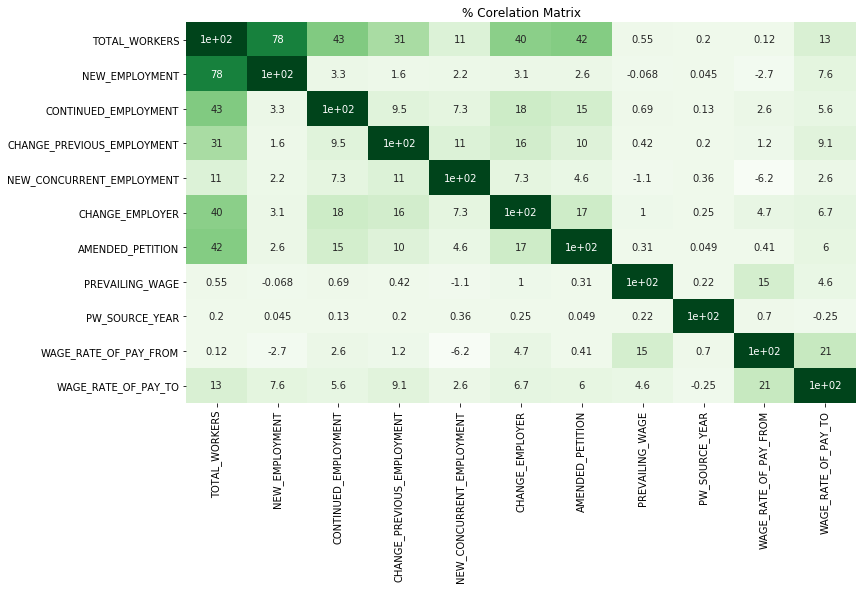

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='Greens')
plt.title('% Corelation Matrix')
plt.show()

In [10]:
df.to_csv("datasets/2017_2018_descriptive_set.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'datasets/2017_2018_descriptive_set.csv'